Could be cool to try to

* fill age with grouped on median/mean
* fill fare with mean
* more info from cabin such as first letter
* use ticket
* qcut family size


see here for more: https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [2]:
survived_train = df_train.Survived

In [3]:
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

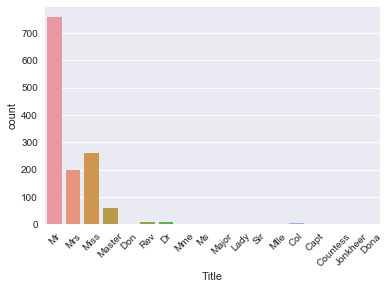

In [4]:
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

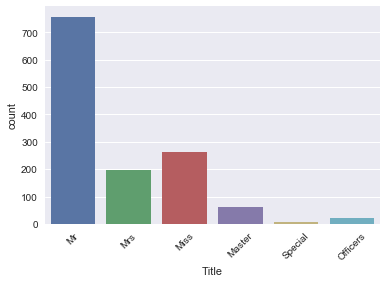

In [5]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 
                                             'Lady', 'Sir', 'Countess', 'Jonkheer'],'Special')
data['Title'] = data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officers')



sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [14]:
data.Sex = data.Sex.replace({'male': 0, 'female': 1});
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
data['Has_Cabin'] = ~data.Cabin.isnull()
data.Has_Cabin = data.Has_Cabin.replace({True: 1, False: 0})
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [18]:
data = data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,0,22.0,1,0,7.2500,S,Mr,0
1,1,1,38.0,1,0,71.2833,C,Mrs,1
2,3,1,26.0,0,0,7.9250,S,Miss,0
3,1,1,35.0,1,0,53.1000,S,Mrs,1
4,3,0,35.0,0,0,8.0500,S,Mr,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null int64
Age          1046 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1308 non-null float64
Embarked     1307 non-null object
Title        1309 non-null object
Has_Cabin    1309 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 142.3+ KB


In [20]:
data.Age = data.Age.fillna(df_train.Age.median())
data.Fare = data.Fare.fillna(df_train.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null int64
Age          1309 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1309 non-null float64
Embarked     1309 non-null object
Title        1309 non-null object
Has_Cabin    1309 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 142.3+ KB


In [21]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,0,22.0,1,0,7.2500,S,Mr,0
1,1,1,38.0,1,0,71.2833,C,Mrs,1
2,3,1,26.0,0,0,7.9250,S,Miss,0
3,1,1,35.0,1,0,53.1000,S,Mrs,1
4,3,0,35.0,0,0,8.0500,S,Mr,0


In [22]:
data['CatAge'] = pd.qcut(data['Age'], 4, labels=False)
data['CatFare']= pd.qcut(data['Fare'], 4, labels=False)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,0,22.0,1,0,7.2500,S,Mr,0,0,0
1,1,1,38.0,1,0,71.2833,C,Mrs,1,3,3
2,3,1,26.0,0,0,7.9250,S,Miss,0,1,1
3,1,1,35.0,1,0,53.1000,S,Mrs,1,2,3
4,3,0,35.0,0,0,8.0500,S,Mr,0,2,1


In [23]:
data = data.drop(['Age', 'Fare'], axis=1)
data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,0,1,0,S,Mr,0,0,0
1,1,1,1,0,C,Mrs,1,3,3
2,3,1,0,0,S,Miss,0,1,1
3,1,1,1,0,S,Mrs,1,2,3
4,3,0,0,0,S,Mr,0,2,1


In [28]:
data.Fam_Size = data.SibSp + data.Parch
data = data.drop(['SibSp','Parch'], axis=1)
data.head()

,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,0,S,Mr,0,0,0
1,1,1,C,Mrs,1,3,3
2,3,1,S,Miss,0,1,1
3,1,1,S,Mrs,1,2,3
4,3,0,S,Mr,0,2,1


In [29]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Pclass,Sex,Has_Cabin,CatAge,CatFare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,0,0,0,0,0,1,0,1,0,0
1,1,1,1,3,3,0,0,0,0,1,0
2,3,1,0,1,1,0,1,1,0,0,0
3,1,1,1,2,3,0,1,0,0,1,0
4,3,0,0,2,1,0,1,0,1,0,0


In [35]:
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

In [38]:
X = data_train.values
test = data_test.values
y = survived_train.values

In [43]:
len(y)

891

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [45]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc


/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.

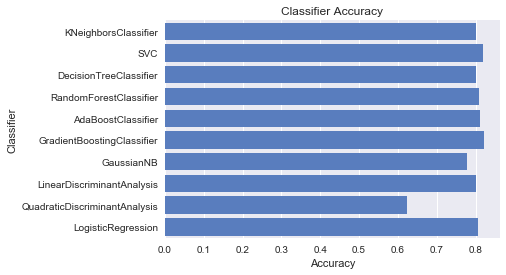

In [46]:
for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [47]:
candidate_classifier = SVC()
candidate_classifier.fit(X, y)
result = candidate_classifier.predict(test)

In [48]:
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [49]:
df_test = pd.read_csv('data/test.csv')
df_test['Survived'] = result

In [50]:
df_test[['PassengerId', 'Survived']].to_csv('Nov_24_SVC.csv', index=False)